# Evaluate the performance of ML algos with Resampling

## Why is this _really_ needed?

Discussed in the hands-on session.

We are going to look at 4 different techniques that we can use to split up our training dataset and create useful estimates of performance for our ML algorithms:

1. Split into Train and Test Sets
1. k-fold Cross-Validation
1. Leave One Out Cross-Validation
1. Repeated Random Test-Train Splits

## 1. Split into Train and Test Sets

Discussed in the lecture, and also in the hands-on.

This algorithm evaluation technique is very fast. It has pros and cons:
* _Pro_. It is ideal for large datasets (millions of records): splitting a large dataset into largish sub-datasets allows that that 1) each split of the data is **not too tiny**, and 2) both are **representative** of the underlying problem. Because of the speed, it is useful to use this approach when the algorithm you are investigating is slow to train. 
* _Con_. A downside of this technique is that it can have a **high variance**. This means that differences in the training and test dataset can result in meaningful differences in the estimate of accuracy.

In the example below we split our dataset into 67%/33% splits for training and test and evaluate the accuracy of a Logistic Regression model.

In [2]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
# data import
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [46]:
# prepare for the evaluation with a train and test set
test_size = 0.33
seed = 7

In [47]:
# Evaluate using a train and a test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression()            # choose a model
model.fit(X_train, Y_train)             # train on the training set
result = model.score(X_test, Y_test)    # get accuracy as measured on the test set
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 75.591%


## <font color='red'>Exercise</font>

<div class="alert alert-block alert-info">
Try to change the seed, and re-train. Does accuracy change? Is it reproducible fora a fixed seed? for different seeds, could you measure its variance? (up to you, but no need to do more here than just try few seeds and get a feeling..)
</div>

In [48]:
import matplotlib.pyplot as plt
import numpy as np

In [49]:
accuracies = []

for seed in range (1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
    model = LogisticRegression()            # choose a model
    model.fit(X_train, Y_train)             # train on the training set
    result = model.score(X_test, Y_test)    # get accuracy as measured on the test set
    output_result = result*100.0
    print("Seed %2d - Accuracy: %.3f%%" % (seed,output_result))
    accuracies.append(output_result)

Seed  1 - Accuracy: 77.559%
Seed  2 - Accuracy: 73.622%
Seed  3 - Accuracy: 75.591%
Seed  4 - Accuracy: 80.315%
Seed  5 - Accuracy: 78.346%
Seed  6 - Accuracy: 77.953%
Seed  7 - Accuracy: 75.591%
Seed  8 - Accuracy: 78.346%
Seed  9 - Accuracy: 73.622%
Seed 10 - Accuracy: 74.803%
Seed 11 - Accuracy: 77.953%
Seed 12 - Accuracy: 79.921%
Seed 13 - Accuracy: 74.016%
Seed 14 - Accuracy: 75.984%
Seed 15 - Accuracy: 74.803%
Seed 16 - Accuracy: 79.134%
Seed 17 - Accuracy: 78.740%
Seed 18 - Accuracy: 74.016%
Seed 19 - Accuracy: 77.559%
Seed 20 - Accuracy: 74.016%
Seed 21 - Accuracy: 74.016%
Seed 22 - Accuracy: 77.165%
Seed 23 - Accuracy: 76.378%
Seed 24 - Accuracy: 70.079%
Seed 25 - Accuracy: 80.315%
Seed 26 - Accuracy: 77.165%
Seed 27 - Accuracy: 75.197%
Seed 28 - Accuracy: 77.953%
Seed 29 - Accuracy: 77.559%
Seed 30 - Accuracy: 79.134%
Seed 31 - Accuracy: 77.165%
Seed 32 - Accuracy: 77.559%
Seed 33 - Accuracy: 75.591%
Seed 34 - Accuracy: 79.134%
Seed 35 - Accuracy: 73.622%
Seed 36 - Accuracy: 

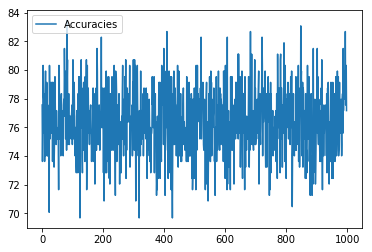

In [52]:
plt.plot(np.array(accuracies), label='Accuracies')
plt.legend()
plt.show()

In [53]:
np.mean(accuracies)

76.423667762250446

In [54]:
np.var(accuracies)

5.3327756627807874

## <font color='red'>Done</font>. Let's continue.

## <font color='red'>Exercise</font>

<div class="alert alert-block alert-info">
What happens if I check accuracy on the _train_ set (conceptually wrong)? Do I see something different or not? What is the drawback if I do this mistake?
</div>

In [55]:
accuracies_wrong = []

for seed in range (1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
    model = LogisticRegression()            # choose a model
    model.fit(X_train, Y_train)             # train on the training set
    result = model.score(X_train, Y_train)    # get accuracy as measured on the test set
    output_result = result*100.0
    print("Seed %2d - Accuracy: %.3f%%" % (seed,output_result))
    accuracies_wrong.append(output_result)
    

Seed  1 - Accuracy: 77.043%
Seed  2 - Accuracy: 78.016%
Seed  3 - Accuracy: 78.405%
Seed  4 - Accuracy: 75.681%
Seed  5 - Accuracy: 75.875%
Seed  6 - Accuracy: 76.654%
Seed  7 - Accuracy: 78.210%
Seed  8 - Accuracy: 77.237%
Seed  9 - Accuracy: 78.988%
Seed 10 - Accuracy: 78.405%
Seed 11 - Accuracy: 77.432%
Seed 12 - Accuracy: 76.654%
Seed 13 - Accuracy: 78.599%
Seed 14 - Accuracy: 77.043%
Seed 15 - Accuracy: 78.016%
Seed 16 - Accuracy: 77.043%
Seed 17 - Accuracy: 77.237%
Seed 18 - Accuracy: 78.599%
Seed 19 - Accuracy: 76.848%
Seed 20 - Accuracy: 76.848%
Seed 21 - Accuracy: 78.988%
Seed 22 - Accuracy: 76.848%
Seed 23 - Accuracy: 78.599%
Seed 24 - Accuracy: 80.545%
Seed 25 - Accuracy: 75.681%
Seed 26 - Accuracy: 76.265%
Seed 27 - Accuracy: 77.237%
Seed 28 - Accuracy: 77.237%
Seed 29 - Accuracy: 77.821%
Seed 30 - Accuracy: 76.459%
Seed 31 - Accuracy: 76.654%
Seed 32 - Accuracy: 77.043%
Seed 33 - Accuracy: 77.626%
Seed 34 - Accuracy: 75.292%
Seed 35 - Accuracy: 77.821%
Seed 36 - Accuracy: 

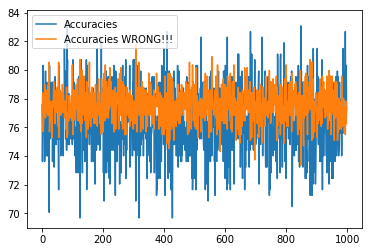

In [56]:
plt.plot(np.array(accuracies), label='Accuracies')
plt.plot(np.array(accuracies_wrong), label='Accuracies WRONG!!!')
plt.legend()
plt.show()

In [57]:
np.mean(accuracies)

76.423667762250446

In [58]:
np.mean(accuracies_wrong)

77.541549331432591

In [59]:
np.var(accuracies)

5.3327756627807874

In [60]:
np.var(accuracies_wrong)

1.338062074311958

## <font color='red'>Done</font>. Let's continue.

## <font color='red'>Exercise</font>

<div class="alert alert-block alert-info">
What if I change the training/test ratio?
</div>

In [ ]:
### put your code here

## <font color='red'>Done</font>. Let's continue.

## 2. K-fold Cross-Validation

Discussed in the hands-on.

In [61]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score   # <---
from sklearn.linear_model import LogisticRegression

In [64]:
# Evaluate using Cross Validation
num_folds = 2
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 76.693% (2.995%)


## <font color='red'>Exercise</font>

<div class="alert alert-block alert-info">
What if change the nb folds?
</div>

In [ ]:
### put your code here

## <font color='red'>Done</font>. Let's continue.

## 3. Leave One Out Cross-Validation

Discussed in the hands-on.

In [65]:
from sklearn.model_selection import LeaveOneOut       # <---
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [66]:
# Evaluate using Leave One Out Cross Validation
loocv = LeaveOneOut()
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=loocv)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 76.823% (42.196%)


## 4. Repeated Random Test-Train Splits

In [ ]:
from sklearn.model_selection import ShuffleSplit      # <---
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [ ]:
# Evaluate using Shuffle Split Cross Validation
n_splits = 10
test_size = 0.33
seed = 7

kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

## OK, fine, but.. what techniques to use when?!?

There are some tips to consider what resampling technique to use in different circumstances.

* Generally k-fold cross-validation is the gold standard for evaluating the performance of a ML algorithm on unseen data with k set to 3, 5, or 10.

* Using a train/test split is good for speed when using a slow algorithm and produces performance estimates with lower bias when using large datasets.

* Techniques like leave-one-out cross-validation and repeated random splits can be useful intermediates when trying to balance variance in the estimated performance, model training speed and dataset size.

The best advice is to experiment and find a technique for your problem that is fast and produces reasonable estimates of performance that you can use to make decisions. If in doubt, use 10-fold cross-validation.

## Summary

What we did:

* we discovered 4 statistical techniques that we can use to estimate the performance of ML algorithms, called Resampling. 

## What's next 

Now we will see how you can evaluate the performance of classification and regression algorithms using a suite of different metrics and built in evaluation reports.